## Part 1. Data Preparation

In [1]:
# python library version
import sys
print('Python: {}'.format(sys.version))

import numpy
print('numpy: {}'.format(sys.version))

import matplotlib
print('matplotlib: {}'.format(sys.version))

import pandas
print('pandas: {}'.format(sys.version))

import sklearn
print('sklearn: {}'.format(sys.version))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
numpy: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
matplotlib: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
pandas: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
sklearn: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


In [2]:
#loading packages
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

In [3]:
#read datasets
mort2017 = pd.read_csv('https://practicum-mitre.s3.amazonaws.com/mort2017.csv')

In [4]:
#examine datasets shape
print('Mortality data for 2017 has {} rows of record and {} columns.'.format(mort2017.shape[0], mort2017.shape[1]))

Mortality data for 2017 has 2820034 rows of record and 116 columns.


In [5]:
#check first few rows
mort2017.head() # there are still many null values

,restatus,educ1989,educ2003,educflag,monthdth,sex,age,ageflag,ager52,ager27,ager12,ager22,placdth,marstat,weekday,year,injwork,mandeath,methdisp,autopsy,activity,injury,ucod,ucr358,ucr113,ucr130,ucr39,eanum,econdp_1,econds_1,enicon_1,econdp_2,econds_2,enicon_2,econdp_3,econds_3,enicon_3,econdp_4,econds_4,enicon_4,econdp_5,econds_5,enicon_5,econdp_6,econds_6,enicon_6,econdp_7,econds_7,enicon_7,econdp_8,econds_8,enicon_8,econdp_9,econds_9,enicon_9,econdp_10,econds_10,enicon_10,econdp_11,econds_11,enicon_11,econdp_12,econds_12,enicon_12,econdp_13,econds_13,enicon_13,econdp_14,econds_14,enicon_14,econdp_15,econds_15,enicon_15,econdp_16,econds_16,enicon_16,econdp_17,econds_17,enicon_17,econdp_18,econds_18,enicon_18,econdp_19,econds_19,enicon_19,econdp_20,econds_20,enicon_20,ranum,record_1,record_2,record_3,record_4,record_5,record_6,record_7,record_8,record_9,record_10,record_11,record_12,record_13,record_14,record_15,record_16,record_17,record_18,record_19,record_20,race,brace,raceimp,racer3,racer5,hispanic,hspanicr
0,1,NaN,4.0,1,1,M,1071,NaN,40,20,9,NaN,1,M,2,2017,U,7.0,C,N,NaN,NaN,G20,188,51,NaN,37,1,1,1,G20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,G20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,1.0,1,1,M,1074,NaN,40,20,9,NaN,1,D,4,2017,U,7.0,C,N,NaN,NaN,M726,315,111,NaN,37,2,1,1,A419,2.0,1.0,M726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,M726,A419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
2,1,NaN,4.0,1,1,M,1059,NaN,37,17,8,NaN,4,M,3,2017,U,7.0,C,N,NaN,NaN,C159,77,21,NaN,15,2,1,1,C159,6.0,1.0,F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,C159,F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
3,1,NaN,1.0,1,1,M,1090,NaN,44,24,11,NaN,4,M,3,2017,U,7.0,B,N,NaN,NaN,C61,113,33,NaN,11,1,1,1,C61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,C61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,3,100,8
4,1,NaN,5.0,1,1,M,1066,NaN,39,19,9,NaN,4,M,3,2017,U,7.0,C,N,NaN,NaN,J449,267,86,NaN,28,3,1,1,J449,6.0,1.0,C900,6.0,2.0,F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,J449,C900,F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


In [6]:
#check variable type and missing value distribution
Col_name = []
Col_type = []
Missing_value_num = []
Missing_value_percent = []

for col in mort2017.columns:
    Col_name.append(col)
    Col_type.append(mort2017[col].dtype)
    Missing_value_num.append(mort2017[col].isnull().sum())
    Missing_value_percent.append(mort2017[col].isnull().sum()/len(mort2017))
    
col_info = pd.DataFrame({'column_name': Col_name,
                         'column_type':Col_type,
                         'missing_total':Missing_value_num,                            
                         'percent_missing': Missing_value_percent})

col_info = col_info.sort_values(by = 'percent_missing', ascending = False) 
col_info

,column_name,column_type,missing_total,percent_missing
79,econdp_18,float64,2820034,1.000000
106,record_18,float64,2820034,1.000000
81,enicon_18,float64,2820034,1.000000
78,enicon_17,float64,2820034,1.000000
77,econds_17,float64,2820034,1.000000
76,econdp_17,float64,2820034,1.000000
75,enicon_16,float64,2820034,1.000000
74,econds_16,float64,2820034,1.000000
73,econdp_16,float64,2820034,1.000000
82,econdp_19,float64,2820034,1.000000


In [7]:
#define column drop list
#firstly drop those columns with too many missing values
drop_col_v1 = col_info[col_info['percent_missing'] > 0.2]['column_name'].to_list()

#secondly drop those columns with repetitive or undefined meaning
drop_col_v2 = ['methdisp', 'autopsy', 'eanum', 
               'econdp_1', 'econds_1', 'enicon_1', 
               'age', 'ager52', 'ager27','educflag','year',
               'ranum', 'record_1', 'racer3', 'racer5',
              'ucr358','ucr113','ucr39','hspanicr']

#genderate the overall drop list
drop_col = drop_col_v1 + drop_col_v2

In [8]:
# drop those columns
mort2017.drop(drop_col, axis=1, inplace=True)

In [9]:
# drop rows with missing values
mort2017.dropna(inplace = True)

In [10]:
#let us look at our data again
mort2017.head()

,restatus,educ2003,monthdth,sex,ager12,placdth,marstat,weekday,injwork,mandeath,ucod,race,hispanic
0,1,4.0,1,M,9,1,M,2,U,7.0,G20,1,100
1,1,1.0,1,M,9,1,D,4,U,7.0,M726,1,100
2,1,4.0,1,M,8,4,M,3,U,7.0,C159,1,100
3,1,1.0,1,M,11,4,M,3,U,7.0,C61,3,100
4,1,5.0,1,M,9,4,M,3,U,7.0,J449,1,100


In [11]:
mort2017.tail()

,restatus,educ2003,monthdth,sex,ager12,placdth,marstat,weekday,injwork,mandeath,ucod,race,hispanic
2820029,1,3.0,12,F,11,1,W,1,U,7.0,I38,1,260
2820030,1,4.0,12,F,4,3,S,3,U,7.0,E668,1,299
2820031,1,1.0,12,F,10,5,W,6,U,7.0,I250,2,100
2820032,1,2.0,10,M,9,6,S,6,U,7.0,C259,2,100
2820033,4,9.0,11,M,8,5,U,4,U,7.0,I119,2,998


In [12]:
mort2017.dtypes

restatus      int64
educ2003    float64
monthdth      int64
sex          object
ager12        int64
placdth       int64
marstat      object
weekday       int64
injwork      object
mandeath    float64
ucod         object
race          int64
hispanic      int64
dtype: object

In [13]:
for col in mort2017.columns:
    if col == 'ucod':
        pass
    else:
        print(mort2017[col].value_counts())

1    2004890
2     421412
3      83711
4       5907
Name: restatus, dtype: int64
3.0    1082911
4.0     306905
2.0     270459
6.0     257439
1.0     249283
5.0     157566
7.0     105427
9.0      43585
8.0      42345
Name: educ2003, dtype: int64
1     232532
12    231821
3     224659
11    208408
10    208328
2     207972
4     206542
5     204831
8     198619
9     198395
7     198378
6     195435
Name: monthdth, dtype: int64
M    1295542
F    1220378
Name: sex, dtype: int64
11    766014
10    583770
9     476221
8     337623
7     157235
6      75542
5      58471
4      31412
1      20331
3       5251
2       3705
12       345
Name: ager12, dtype: int64
4    765564
1    719436
6    484807
5    211166
2    163471
7    160546
3     10376
9       554
Name: placdth, dtype: int64
M    915846
W    820334
D    406904
S    353268
U     19568
Name: marstat, dtype: int64
1    364596
6    362371
7    361779
2    358191
5    357261
3    355859
4    355739
9       124
Name: weekday, dtype: int64
U

In [14]:
#It seems all the features left should be changed to categotical data
for col in mort2017.columns:
    mort2017[col] = mort2017[col].astype('category')

In [15]:
#target enconding
mort2017['opioid_related_death'] = np.where(mort2017['ucod'].str.contains('F11'), 1, 0)

In [16]:
# split the dataset based on different levels of target
# obtain death records related to opioid
mydf = mort2017[mort2017['opioid_related_death'] == 1]

In [17]:
# obtain death records not related to opioid
compare = mort2017[mort2017['opioid_related_death'] == 0]

In [18]:
compare.head()

,restatus,educ2003,monthdth,sex,ager12,placdth,marstat,weekday,injwork,mandeath,ucod,race,hispanic,opioid_related_death
0,1,4.0,1,M,9,1,M,2,U,7.0,G20,1,100,0
1,1,1.0,1,M,9,1,D,4,U,7.0,M726,1,100,0
2,1,4.0,1,M,8,4,M,3,U,7.0,C159,1,100,0
3,1,1.0,1,M,11,4,M,3,U,7.0,C61,3,100,0
4,1,5.0,1,M,9,4,M,3,U,7.0,J449,1,100,0


In [19]:
#check how many people died because of opioid overusage in 2017
mydf.shape

(368, 14)

In [20]:
# select same number of record from the control group
compare_subset = compare.sample(n = 368)

In [21]:
compare_subset.shape
#perfect now we have the same number of record

(368, 14)

In [22]:
# join them together
cleandf = pd.concat([mydf,compare_subset], ignore_index = True, sort = False)

## Part 2. Visualization

### Time Series Plot

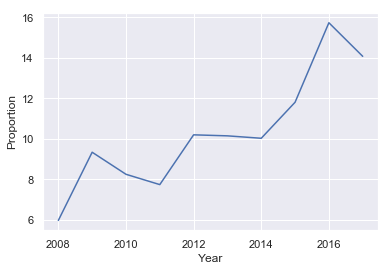

In [23]:
#What is the opioid related death trend in ten years (2008~2017)
opioid_death_trend = pd.DataFrame({'Year': [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017],
                         'Opioid Overdosage':[148,228,204,195,260,264,264,321,433,397],                        
                         'Proportion': [5.97,9.34,8.25,7.74,10.2,10.15,10.03,11.81,15.74,14.08]})
sns.lineplot(x = 'Year', y='Proportion', data = opioid_death_trend)

In [24]:
cleandf.head()

,restatus,educ2003,monthdth,sex,ager12,placdth,marstat,weekday,injwork,mandeath,ucod,race,hispanic,opioid_related_death
0,1,3.0,1,F,7,1,M,1,U,5.0,F119,1,100,1
1,1,4.0,6,M,5,4,D,2,U,7.0,F119,2,100,1
2,1,4.0,11,M,5,1,S,2,U,5.0,F111,2,100,1
3,1,3.0,12,M,6,1,S,3,U,7.0,F111,1,100,1
4,2,2.0,2,M,8,1,D,7,U,7.0,F111,1,100,1


### Univariate Analysis

### Resident Status 
- 1 `RESIDENTS` State and County of Occurrence and Residence are the same. 
- 2 `INTRASTATE NONRESIDENTS` State of Occurrence and Residence are the same, but County is different. 
- 3 `INTERSTATE NONRESIDENTS` State of Occurrence and Residence are different, but both are in the U.S. 
- 4 `FOREIGN RESIDENTS ` State of Occurrence is one of the 50 States or the District of Columbia, but Place of Residence is outside of the U.S. 

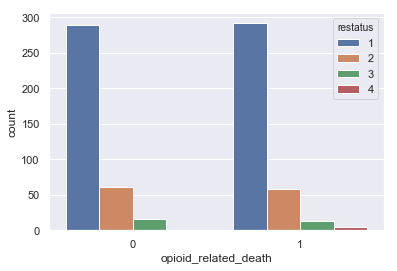

In [25]:
sns.countplot(x = "opioid_related_death", hue = 'restatus', data = cleandf)

### Education (2003 revision) 
- 1 ...  8th grade or less 
- 2 ...  9 - 12th grade, no diploma 
- 3 ...  high school graduate or GED completed 
- 4 ...  some college credit, but no degree 
- 5 ...  Associate degree 
- 6 ...  Bachelor’s degree 
- 7 ...   Master’s degree 
- 8 ...   Doctorate or professional degree 
- 9 ...   Unknown

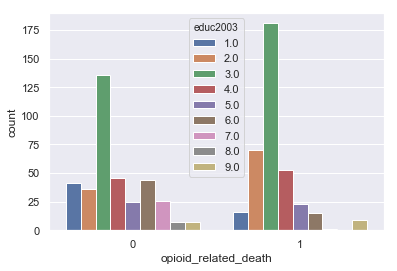

In [26]:
sns.countplot(x = "opioid_related_death", hue = 'educ2003', data = cleandf)

### Month of Death
- 01 ... January 
- 02 ...  February 
- 03 ...  March 
- 04 ...  April 
- 05 ...  May 
- 06 ...  June 
- 07 ...  July 
- 08 ...  August 
- 09 ...  September 
- 10 ...  October 
- 11 ...  November 
- 12 ...  December 

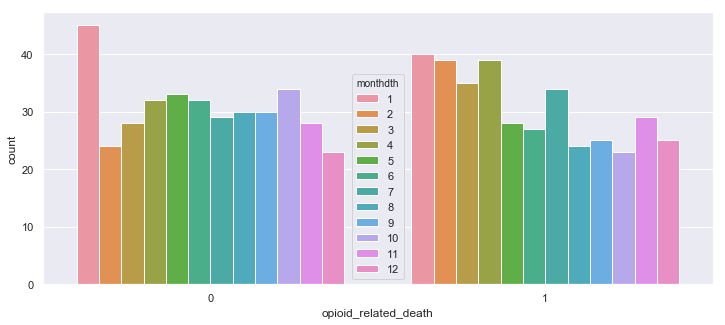

In [27]:
plt.figure(figsize=(12, 5))
sns.countplot(x = "opioid_related_death", hue = 'monthdth', data = cleandf)

### Sex
- M ...  Male
- F ...  Female

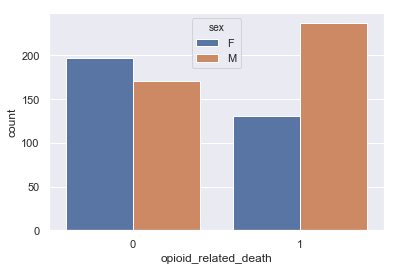

In [28]:
sns.countplot(x = "opioid_related_death", hue = 'sex', data = cleandf)

### Age Recode 12 
- 1 ... Under 1 year (includes not stated infant ages) 
- 2 ... 1 - 4 years 
- 3 ... 5 - 14 years 
- 4 ... 15 - 24 years 
- 5 ... 25 - 34 years 
- 6 ... 35 - 44 years 
- 7 ... 45 - 54 years 
- 8 ... 55 - 64 years 
- 9 ... 65 - 74 years 
- 10 ... 75 - 84 years 
- 11 ... 85 years and over 
- 12 ... Age not stated

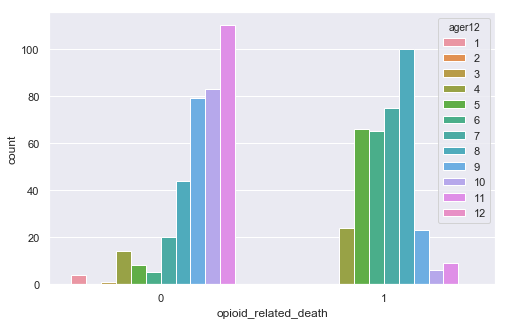

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x = "opioid_related_death", hue = 'ager12', data = cleandf)

### Place of Death and Decedent’s Status 
- 1 ... Hospital, clinic or Medical Center - Inpatient 
- 2 ... Hospital, Clinic or Medical Center - Outpatient or admitted to Emergency Room 
- 3 ... Hospital, Clinic or Medical Center - Dead on Arrival 
- 4 ... Decedent’s home 
- 5 ... Hospice facility 
- 6 ... Nursing home/long term care 
- 7 ... Other 
- 9 ... Place of death unknown

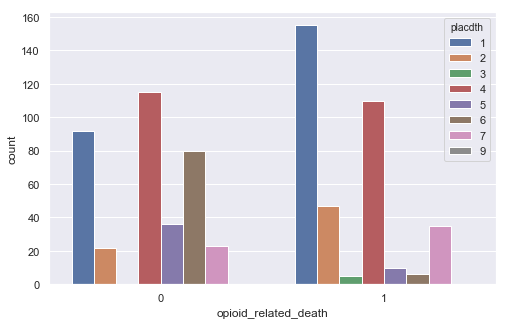

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x = "opioid_related_death", hue = 'placdth', data = cleandf)

### Marital Status 
- S ... Never married, single 
- M ... Married
- W ... Widowed 
- D ... Divorced 
- U ... Marital Status unknown

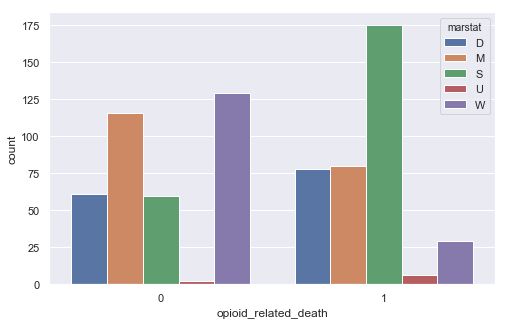

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x = "opioid_related_death", hue = 'marstat', data = cleandf)

### Day of Week of Death 
- 1 ... Sunday 
- 2 ... Monday 
- 3 ... Tuesday 
- 4 ... Wednesday 
- 5 ... Thursday 
- 6 ... Friday 
- 7 ... Saturday 
- 9 ... Unknown

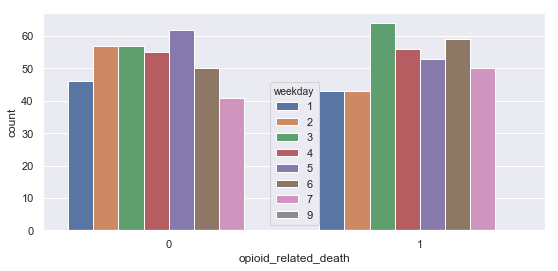

In [32]:
plt.figure(figsize=(9, 4))
sns.countplot(x = "opioid_related_death", hue = 'weekday', data = cleandf)

### Injury at Work 
- Y ... Yes 
- N ... No 
- U ... Unknown 

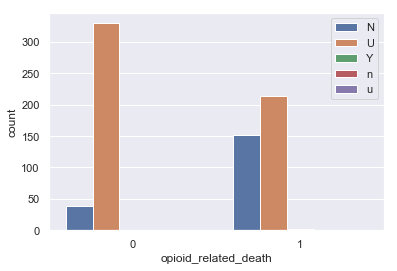

In [33]:
sns.countplot(x = "opioid_related_death", hue = 'injwork', data = cleandf)
plt.legend(loc='upper right')

### Manner of Death 
- 1 ... Accident 
- 2 ... Suicide 
- 3 ... Homicide 
- 4 ... Pending investigation 
- 5 ... Could not determine 
- 6 ... Self-Inflicted 
- 7 ... Natural

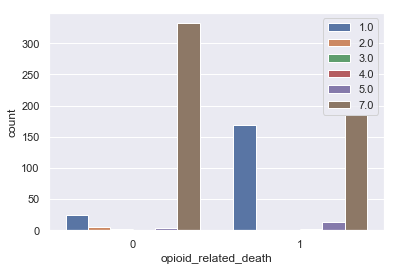

In [34]:
sns.countplot(x = "opioid_related_death", hue = 'mandeath', data = cleandf)
plt.legend(loc='upper right')

### RACE
- 01 ... White 
- 02 ... Black 
- 03 ... American Indian (includes Aleuts and Eskimos) 
- 04 ... Chinese 
- 05 ... Japanese 
- 06 ... Hawaiian (includes Part-Hawaiian) 
- 07 ... Filipino 
- 18   ... Asian Indian 
- 28 ... Korean 
- 38 ... Samoan 
- 48 ... Vietnamese 
- 58 ... Guamanian 
- 68 ... Other Asian or Pacific Islander in areas reporting codes 18-58
- 78 ... Combined other Asian or Pacific Islander, includes codes 18-68 for areas that do not report them separately 

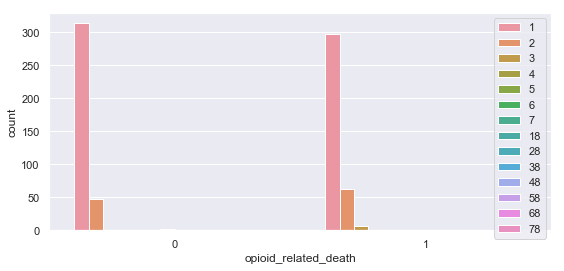

In [35]:
plt.figure(figsize=(9, 4))
sns.countplot(x = "opioid_related_death", hue = 'race', data = cleandf)
plt.legend(loc='upper right')

### Multivariate Analysis

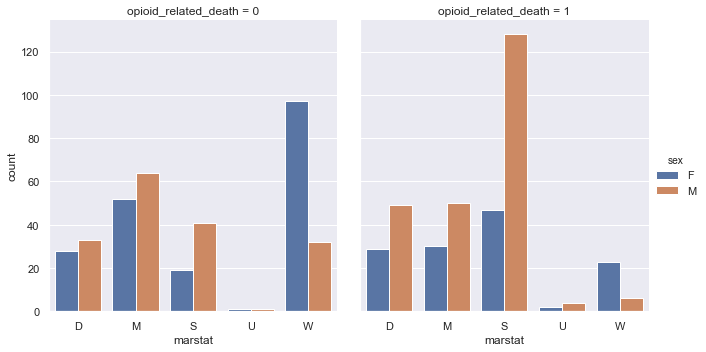

In [36]:
g = sns.catplot(x = "marstat", hue = "sex", col="opioid_related_death",
                data = cleandf, kind="count",
                height = 5, aspect=.9);

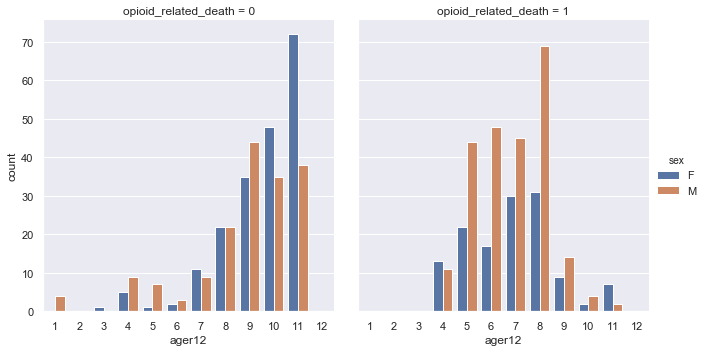

In [37]:
g = sns.catplot(x = "ager12", hue = "sex", col="opioid_related_death",
                data = cleandf, kind="count",
                height = 5, aspect=.9);

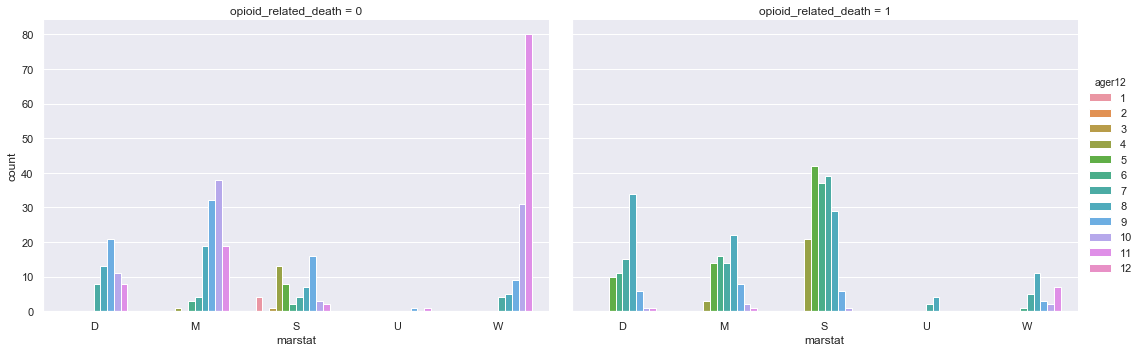

In [38]:
g = sns.catplot(x = "marstat", hue = "ager12", col="opioid_related_death",
                data = cleandf, kind="count",
                height = 5, aspect=1.5);

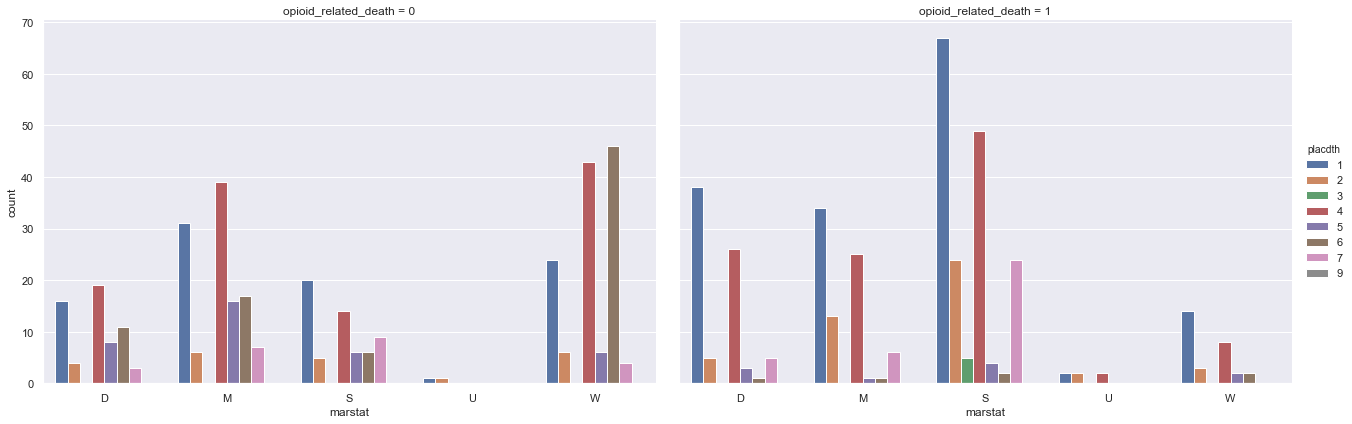

In [39]:
g = sns.catplot(x = "marstat", hue = "placdth", col="opioid_related_death",
                data = cleandf, kind="count",
                height = 6, aspect=1.5);

## Part 3. Modeling

In [77]:
#create trainning set
non_opioid_subset = compare.sample(n = 368)
model_df = pd.concat([mydf, non_opioid_subset], ignore_index = True, sort = False)
model_df.shape

(736, 14)

In [78]:
model_df.head(1)

,restatus,educ2003,monthdth,sex,ager12,placdth,marstat,weekday,injwork,mandeath,ucod,race,hispanic,opioid_related_death
0,1,3.0,1,F,7,1,M,1,U,5.0,F119,1,100,1


In [79]:
model_df.drop([ 'placdth', 'monthdth', 'mandeath', 'ucod', 'weekday'], axis = 1, inplace = True)

In [80]:
model_df.head(1)

,restatus,educ2003,sex,ager12,marstat,injwork,race,hispanic,opioid_related_death
0,1,3.0,F,7,M,U,1,100,1


In [81]:
model_df.dtypes

restatus                category
educ2003                category
sex                     category
ager12                  category
marstat                 category
injwork                 category
race                    category
hispanic                category
opioid_related_death       int32
dtype: object

In [82]:
#encoding variables
model_df = model_df.apply(LabelEncoder().fit_transform)
model_df.head()

,restatus,educ2003,sex,ager12,marstat,injwork,race,hispanic,opioid_related_death
0,0,2,0,4,1,1,0,0,1
1,0,3,1,2,0,1,1,0,1
2,0,3,1,2,2,1,1,0,1
3,0,2,1,3,2,1,0,0,1
4,1,1,1,5,0,1,0,0,1


In [97]:
# Set the seed.
np.random.seed(1234)

In [98]:
# splitting the dataset to trainnning set and test set
y = model_df["opioid_related_death"]
X = model_df.drop("opioid_related_death", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [99]:
# decision tree 
decisiointree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decisiointree.fit(X_train, y_train)

score_decisiontree = decisiointree.score(X_test,y_test)
print('The accuracy of Decision Tree is', score_decisiontree)

The accuracy of Decision Tree is 0.7717391304347826


In [100]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

# y_pred = gaussian.predict(X_test)

score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.717391304347826


In [101]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)

score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.8152173913043478


In [102]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.7771739130434783


In [103]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.7391304347826086


In [104]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.8043478260869565


In [106]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits = 20, random_state = 22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []

classifiers = ['Naive Bayes','Linear Svm','Logistic Regression','Decision Tree','KNN','Random Forest']

models=[GaussianNB(), svm.SVC(kernel='linear'), LogisticRegression(), DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9), RandomForestClassifier(n_estimators=2000)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std}, index = classifiers)       
models_dataframe

,CV Mean,Std
Naive Bayes,0.742155,0.119993
Linear Svm,0.760736,0.056145
Logistic Regression,0.765015,0.071766
Decision Tree,0.778566,0.058442
KNN,0.790240,0.097289
Random Forest,0.793281,0.050021


### We choose random Forest as our final model

In [107]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.7608695652173914


In [108]:
def check(n):
    rf = RandomForestClassifier(n_estimators = n, random_state = 1234, max_depth = 5)
    rf.fit(X_train,y_train)
    y1 = rf.predict(X_test)
    score_randomforest = randomforest.score(X_test,y_test)
    return [score_randomforest,n]
results = [check(i) for i in range(100,2501,100)]
results

[[0.7608695652173914, 100],
 [0.7608695652173914, 200],
 [0.7608695652173914, 300],
 [0.7608695652173914, 400],
 [0.7608695652173914, 500],
 [0.7608695652173914, 600],
 [0.7608695652173914, 700],
 [0.7608695652173914, 800],
 [0.7608695652173914, 900],
 [0.7608695652173914, 1000],
 [0.7608695652173914, 1100],
 [0.7608695652173914, 1200],
 [0.7608695652173914, 1300],
 [0.7608695652173914, 1400],
 [0.7608695652173914, 1500],
 [0.7608695652173914, 1600],
 [0.7608695652173914, 1700],
 [0.7608695652173914, 1800],
 [0.7608695652173914, 1900],
 [0.7608695652173914, 2000],
 [0.7608695652173914, 2100],
 [0.7608695652173914, 2200],
 [0.7608695652173914, 2300],
 [0.7608695652173914, 2400],
 [0.7608695652173914, 2500]]

In [109]:
# select the most important features
sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

3
Index(['educ2003', 'ager12', 'marstat'], dtype='object')


In [110]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[65, 18],
       [26, 75]], dtype=int64)

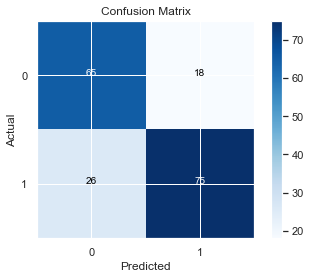

In [111]:
import itertools
plt.imshow(cm,cmap = plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(2) 
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cm.max() / 2.
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],'d'),horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
plt.show();

In [112]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(65, 18, 26, 75)

In [113]:
accuracy = (tp+tn)/(tn+fp+fn+tp)
accuracy

0.7608695652173914